<a href="https://colab.research.google.com/github/Gisellev14/report-generator/blob/main/ML606_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grocery Store Chain Sales Dataset
The objective of this project is to forecast future grocery product demand using historical transactional data, based on this comprehensive synthetic dataset with records from a multi-location grocery store chain, provided by [Kaggle](https://www.kaggle.com/datasets/pratyushpuri/grocery-store-sales-dataset-in-2025-1900-record?resource=download), which contains detailed transaction data across various store locations, product categories, customer interactions, and promotional activities. The model aims to predict the quantity sold of products over time in order to support inventory planning and demand-driven decision making.

In [1]:
import pandas as pd
import kagglehub
path = kagglehub.dataset_download("pratyushpuri/grocery-store-sales-dataset-in-2025-1900-record")

Using Colab cache for faster access to the 'grocery-store-sales-dataset-in-2025-1900-record' dataset.


In [2]:
import os

print(f"Files in the dataset directory: {os.listdir(path)}")

Files in the dataset directory: ['grocery_chain_data.csv', 'grocery_chain_data.json', 'grocery_chain_data.xlsx']


In [3]:
data_file = os.path.join(path, 'grocery_chain_data.csv')
df = pd.read_csv(data_file)

print("Dataset loaded successfully. Displaying the first 5 rows:")
display(df.head())

Dataset loaded successfully. Displaying the first 5 rows:


,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


# EDA: Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1980 non-null   int64  
 1   store_name        1955 non-null   object 
 2   transaction_date  1980 non-null   object 
 3   aisle             1980 non-null   object 
 4   product_name      1980 non-null   object 
 5   quantity          1980 non-null   float64
 6   unit_price        1980 non-null   float64
 7   total_amount      1980 non-null   float64
 8   discount_amount   1980 non-null   float64
 9   final_amount      1980 non-null   float64
 10  loyalty_points    1980 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 170.3+ KB


In [5]:
df.shape

(1980, 11)

In [6]:
df.isna().sum()

,0
customer_id,0
store_name,25
transaction_date,0
aisle,0
product_name,0
quantity,0
unit_price,0
total_amount,0
discount_amount,0
final_amount,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,customer_id,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,5542.958081,2.968182,15.488045,45.902576,4.469591,41.432985,255.147980
std,2575.771856,1.419028,8.400823,35.018599,4.962001,32.593328,146.009333
min,1006.000000,1.000000,0.990000,1.010000,0.000000,-3.430000,0.000000
25%,3271.500000,2.000000,8.240000,18.000000,1.240000,15.800000,128.000000
50%,5582.500000,3.000000,15.190000,37.130000,3.045000,32.820000,265.500000
75%,7791.750000,4.000000,22.862500,67.930000,5.402500,60.800000,378.000000
max,9998.000000,5.000000,29.980000,149.900000,29.940000,147.910000,500.000000


<Axes: >

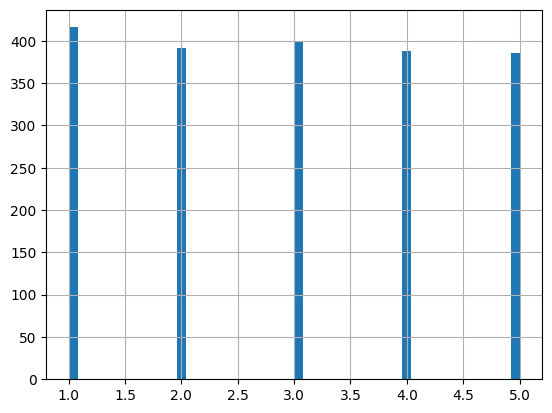

In [9]:
df["quantity"].hist(bins=50)

## EDA: Foundings and Data treatment

After analyzing the dataset we found two main issues to fix:


*   25 rows missing store_name which is a categorical variable with vital importance for our purpose
*   customer_id is stored as numerical when it should be text, therefore we must transform it.
*   transaction_date is object instead of datetime, therefore we must transform it for future analysis.

## Conclussion

* As our main purpose is to predict product demand, imputing the mode for the missing rows wouldn't be the best option for our model, as we'll be overinflating sells for one store.
* In order to preserve fidelity to actual behavior, and considering dataset scale (25/1980), we will drop null rows.
* To handle customer_id we are simply transform it into text.
* To handle transaction_date we simply transform it into datetime.



In [10]:
print(f"Missing values in 'store_name' before cleaning: {df['store_name'].isnull().sum()}")

Missing values in 'store_name' before cleaning: 25


In [11]:
df = df.dropna(subset=["store_name"])

print(f"Missing values in 'store_name' after cleaning: {df['store_name'].isnull().sum()}")

Missing values in 'store_name' after cleaning: 0


In [12]:
df["customer_id"] = df["customer_id"].astype(str)

In [13]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       1955 non-null   object        
 1   store_name        1955 non-null   object        
 2   transaction_date  1955 non-null   datetime64[ns]
 3   aisle             1955 non-null   object        
 4   product_name      1955 non-null   object        
 5   quantity          1955 non-null   float64       
 6   unit_price        1955 non-null   float64       
 7   total_amount      1955 non-null   float64       
 8   discount_amount   1955 non-null   float64       
 9   final_amount      1955 non-null   float64       
 10  loyalty_points    1955 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 183.3+ KB


In [15]:
df.isna().sum()

,0
customer_id,0
store_name,0
transaction_date,0
aisle,0
product_name,0
quantity,0
unit_price,0
total_amount,0
discount_amount,0
final_amount,0


In [16]:
df.describe()

,transaction_date,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
count,1955,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,2024-08-09 01:22:29.769820928,2.965217,15.504747,45.836900,4.465478,41.371422,255.134527
min,2023-08-07 00:00:00,1.000000,0.990000,1.010000,0.000000,-3.430000,0.000000
25%,2024-02-15 00:00:00,2.000000,8.275000,18.080000,1.240000,15.880000,127.500000
50%,2024-08-06 00:00:00,3.000000,15.200000,37.360000,3.040000,33.030000,265.000000
75%,2025-02-09 00:00:00,4.000000,22.865000,67.825000,5.405000,60.570000,378.000000
max,2025-08-05 00:00:00,5.000000,29.980000,149.900000,29.940000,147.910000,500.000000
std,NaN,1.417762,8.388975,34.811841,4.952175,32.404914,146.103827


<Axes: >

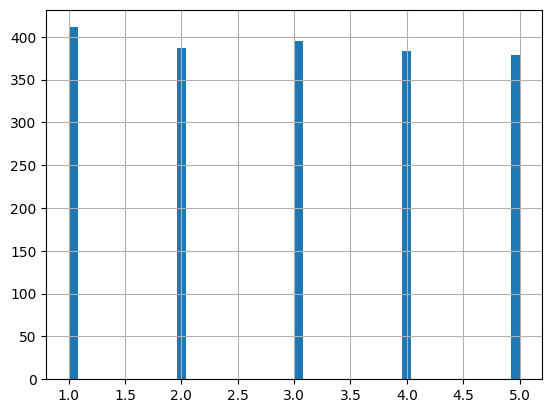

In [17]:
df["quantity"].hist(bins=50)

# Sanity check and Feature engineering

After executing th clean-up, we check again for data types, null data and numerical analysis (to confirm we're not including customer_id anymore) and found that our data is now clean.

We proceed to create time-based features that will be usefull for further analysis and predictions

In [18]:
df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month
df["day_of_week"] = df["transaction_date"].dt.dayofweek
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1979
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       1955 non-null   object        
 1   store_name        1955 non-null   object        
 2   transaction_date  1955 non-null   datetime64[ns]
 3   aisle             1955 non-null   object        
 4   product_name      1955 non-null   object        
 5   quantity          1955 non-null   float64       
 6   unit_price        1955 non-null   float64       
 7   total_amount      1955 non-null   float64       
 8   discount_amount   1955 non-null   float64       
 9   final_amount      1955 non-null   float64       
 10  loyalty_points    1955 non-null   int64         
 11  year              1955 non-null   int32         
 12  month             1955 non-null   int32         
 13  day_of_week       1955 non-null   int32         
 14  is_weekend        1955 non-nu

In [20]:
df.describe()

,transaction_date,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points,year,month,day_of_week,is_weekend
count,1955,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,2024-08-09 01:22:29.769820928,2.965217,15.504747,45.836900,4.465478,41.371422,255.134527,2024.113555,6.420460,2.961637,0.280307
min,2023-08-07 00:00:00,1.000000,0.990000,1.010000,0.000000,-3.430000,0.000000,2023.000000,1.000000,0.000000,0.000000
25%,2024-02-15 00:00:00,2.000000,8.275000,18.080000,1.240000,15.880000,127.500000,2024.000000,3.000000,1.000000,0.000000
50%,2024-08-06 00:00:00,3.000000,15.200000,37.360000,3.040000,33.030000,265.000000,2024.000000,6.000000,3.000000,0.000000
75%,2025-02-09 00:00:00,4.000000,22.865000,67.825000,5.405000,60.570000,378.000000,2025.000000,9.000000,5.000000,1.000000
max,2025-08-05 00:00:00,5.000000,29.980000,149.900000,29.940000,147.910000,500.000000,2025.000000,12.000000,6.000000,1.000000
std,NaN,1.417762,8.388975,34.811841,4.952175,32.404914,146.103827,0.698291,3.413381,1.981248,0.449264


# Test - Training Split

We're using a Time series split, therefore we need to sort the dataset chronologically.

In [21]:
df = df.sort_values("transaction_date").reset_index(drop=True)

In [22]:
df.head(10)

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points,year,month,day_of_week,is_weekend
0,8479,City Fresh Store,2023-08-07,Beverages,Carrots,1.0,28.26,28.26,0.00,28.26,416,2023,8,0,0
1,2559,ValuePlus Market,2023-08-07,Meat & Seafood,Pasta,1.0,15.33,15.33,3.07,12.26,426,2023,8,0,0
2,9336,MegaMart Westside,2023-08-08,Beverages,Orange Juice,4.0,11.73,46.92,7.04,39.88,153,2023,8,1,0
3,7209,FamilyFood Express,2023-08-08,Meat & Seafood,Yogurt,1.0,25.05,25.05,1.86,23.19,283,2023,8,1,0
4,8032,FreshMart Downtown,2023-08-08,Dairy,Onions,5.0,12.05,60.25,12.05,48.20,204,2023,8,1,0
5,8144,Corner Grocery,2023-08-08,Bakery,Cheese,5.0,23.46,117.30,0.00,117.30,471,2023,8,1,0
6,2499,GreenGrocer Plaza,2023-08-11,Bakery,Chicken Breast,3.0,13.16,39.48,7.90,31.58,228,2023,8,4,0
7,3252,ValuePlus Market,2023-08-11,Beverages,Eggs,3.0,22.77,68.31,3.90,64.41,399,2023,8,4,0
8,1897,Corner Grocery,2023-08-12,Snacks & Candy,Bread,5.0,7.54,37.70,3.27,34.43,196,2023,8,5,1
9,4608,City Fresh Store,2023-08-12,Health & Wellness,Salmon,1.0,6.89,6.89,1.03,5.86,281,2023,8,5,1


## Data encoding and scaling
We encode categorical variables before splitting

In [23]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [24]:
df[numerical_cols].describe()

,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points,is_weekend
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,2.965217,15.504747,45.836900,4.465478,41.371422,255.134527,0.280307
std,1.417762,8.388975,34.811841,4.952175,32.404914,146.103827,0.449264
min,1.000000,0.990000,1.010000,0.000000,-3.430000,0.000000,0.000000
25%,2.000000,8.275000,18.080000,1.240000,15.880000,127.500000,0.000000
50%,3.000000,15.200000,37.360000,3.040000,33.030000,265.000000,0.000000
75%,4.000000,22.865000,67.825000,5.405000,60.570000,378.000000,1.000000
max,5.000000,29.980000,149.900000,29.940000,147.910000,500.000000,1.000000


In [25]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_normalize = numerical_cols.drop('is_weekend', 'quantity')

scaler = StandardScaler()

df[numerical_cols_to_normalize] = scaler.fit_transform(df[numerical_cols_to_normalize])

display(df.head())

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points,year,month,day_of_week,is_weekend
0,8479,City Fresh Store,2023-08-07,Beverages,Carrots,-1.386495,1.520867,-0.505041,-0.901951,-0.404716,1.101317,2023,8,0,0
1,2559,ValuePlus Market,2023-08-07,Meat & Seafood,Pasta,-1.386495,-0.020836,-0.876561,-0.281863,-0.898594,1.169779,2023,8,0,0
2,9336,MegaMart Westside,2023-08-08,Beverages,Orange Juice,0.730057,-0.450080,0.031121,0.520010,-0.046036,-0.699233,2023,8,1,0
3,7209,FamilyFood Express,2023-08-08,Meat & Seafood,Yogurt,-1.386495,1.138124,-0.597274,-0.526263,-0.561213,0.190773,2023,8,1,0
4,8032,FreshMart Downtown,2023-08-08,Dairy,Onions,1.435575,-0.411925,0.414135,1.531946,0.210781,-0.350077,2023,8,1,0


In [26]:
from sklearn.model_selection import TimeSeriesSplit

X = df.drop(columns=[
    "quantity",
    "transaction_date",
    "customer_id"
])

X = pd.get_dummies(
    X,
    columns=["store_name", "aisle", "product_name", "day_of_week"],
    drop_first=True
)

y = df["quantity"]

tscv = TimeSeriesSplit()

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1630, 49)
X_test shape: (325, 49)
y_train shape: (1630,)
y_test shape: (325,)


# Model Training

We're selecting a `LinearRegression` as our base model and comparing the results against `RandomForestRegressor` with hyperparameter tuning using `RandomizedSearchCV`

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.34916415901606235
Mean Squared Error (MSE): 0.22602289477091037
Root Mean Squared Error (RMSE): 0.4754186521066568
R-squared (R2): 0.7644454004410136


## Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_regressor = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting Randomized Search for RandomForestRegressor...")
random_search.fit(X_train, y_train)
print("Randomized Search completed.")

print(f"\nBest parameters found: {random_search.best_params_}")
print(f"Best cross-validation score (negative MSE): {random_search.best_score_:.4f}")

Starting Randomized Search for RandomForestRegressor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search completed.

Best parameters found: {'max_depth': 29, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 234}
Best cross-validation score (negative MSE): -0.2194


In [30]:
best_params = random_search.best_params_
print(f"Using best parameters: {best_params}")

best_rf_model = RandomForestRegressor(random_state=42, **best_params)

print("Training RandomForestRegressor with best parameters...")
best_rf_model.fit(X_train, y_train)
print("Training completed.")


Using best parameters: {'max_depth': 29, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 234}
Training RandomForestRegressor with best parameters...
Training completed.


In [31]:
y_pred_rf = best_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Performance with Best Parameters:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R2): {r2_rf}")


Random Forest Regressor Performance with Best Parameters:
Mean Absolute Error (MAE): 0.34491891292979165
Mean Squared Error (MSE): 0.18785916449426152
Root Mean Squared Error (RMSE): 0.43342723090994356
R-squared (R2): 0.8042185491395328


## Model Performance Comparison

### Linear Regression Performance:
- Mean Absolute Error (MAE): 0.3492
- Mean Squared Error (MSE): 0.2260
- Root Mean Squared Error (RMSE): 0.4754
- R-squared (R2): 0.7644

### Random Forest Regressor Performance (with best parameters):
- Mean Absolute Error (MAE): 0.3449
- Mean Squared Error (MSE): 0.1879
- Root Mean Squared Error (RMSE): 0.4334
- R-squared (R2): 0.8042

## Conclusion:

Based on these metrics, the `RandomForestRegressor` demonstrates better performance overall:

*   Lower Error Metrics: It has lower MAE, MSE, and RMSE values, indicating that its predictions are, on average, closer to the actual values compared to the Linear Regression model.
*   Higher R-squared: Meaning that the Random Forest model explains a greater proportion of the variance in the target variable (quantity). With an R2 of `0.8042` compared to `0.7644` for Linear Regression, the Random Forest model has a better fit to the data.

This suggests that the non-linear relationships captured by the ensemble nature of the Random Forest algorithm are more effective in predicting the `quantity` in this dataset than the linear approach.

# Final Discussion: Overall Pipeline Analysis

## Overall Strengths and Limitations

### Strengths:
*   Robust Data Preprocessing: The pipeline included steps for handling missing values (drop missing rows for `store_name`), correct type conversion (`customer_id` to string, `transaction_date` to datetime), and feature engineering (creating `year`, `month`, `day_of_week`, `is_weekend`).
*   Time Series Split: Employing `TimeSeriesSplit` ensured that the model was trained on historical data and tested on future data, which is crucial for forecasting tasks and prevents data leakage.
*   Model Comparison: The comparison between a simpler `LinearRegression` model and a more complex `RandomForestRegressor` provided a good baseline and demonstrated the value of using a non-linear ensemble method for this dataset.
*   Hyperparameter Tuning: `RandomizedSearchCV` was used to optimize the `RandomForestRegressor`, leading to a better-performing model.
*   Clear Performance Metrics: Standard regression metrics (MAE, MSE, RMSE, R2) were used for evaluation, allowing for a clear understanding of model performance.

### Limitations:
*   Synthetic Data: The dataset is synthetic, which may not fully capture the complexities and nuances of real-world grocery sales data. This can limit the generalizability of the model.
*   Limited Feature Engineering: While some time-based features were created, the dataset lacks other potentially powerful features like promotional indicators, holiday effects, external economic factors, or even weather data, which often influence retail sales.
*   Model Scope: Only two models were explored. More advanced time-series specific models could potentially yield even better results.
*   Lack of Granularity in Output: The current model predicts overall quantity, but business problems often require predictions at a more granular level (e.g., specific product in a specific store or specific products on a specific day of the week).
*   Hyperparameter Tuning Depth: The `RandomizedSearchCV` was run for `n_iter=10`, which is a relatively small number of iterations. More extensive tuning could potentially find even better parameters, however it is important to bare in mind that a higher number of iterations would also represent a longer runnig time.

## Implications of the Results for the Business Problem

The ability to accurately forecast product quantity, as demonstrated by the `RandomForestRegressor`, has significant positive implications for the grocery store chain:
*   Improved Inventory Management: More precise demand predictions can lead to optimized stock levels, reducing instances of overstocking and understocking.
*   Enhanced Operational Efficiency: Better forecasting aids in more efficient planning for staffing, logistics, and supply chain management.
*   Reduced Costs: Minimizing waste from expired products and optimizing ordering processes directly translates to cost savings.
*   Increased Sales and Customer Satisfaction: Ensuring product availability when customers want it can boost sales and loyalty.
*   Strategic Decision Making: Insights from the model can inform purchasing decisions, promotional strategies, and product assortment planning.

## Data-Driven Recommendations for Solving the Initial Business Problem

1.  Deploy the Random Forest Model: Given its superior performance over Linear Regression, the current Random Forest Regressor is a strong candidate for initial deployment for demand forecasting.
2.  Granular Forecasting: Depending on business needs, adapt the model to forecast demand at a more granular level (e.g., by individual store, product, or day of the week) if this provides more actionable insights.
3.  Feature Importance Analysis: Use feature importances to guide further data collection and focus on the most impactful factors.

## Is Your Model Explainable?

*   The `Linear Regression model` is inherently more explainable, as the coefficients directly show the relationship between features and the target variable.
*   The `RandomForestRegressor`, being an ensemble of decision trees, is generally less interpretable than Linear Regression. However, its explainability can be significantly enhanced through techniques like:
    *   Feature Importances
    *   SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations):

While not as transparent as Linear Regression, the Random Forest model's decisions can be made quite understandable with the right tools.

## Will You Deploy Your Model?

Yes, the `RandomForestRegressor` demostrated a good performance for production deployment, however it could be improved taking into account feature importance for better, more robust predictions. Overall, it could be deployed confidently.

In [32]:
feature_importances = best_rf_model.feature_importances_

features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

features_df = features_df.sort_values(by='importance', ascending=False)

print("Top 10 Most Informative Features (Random Forest Regressor):")
display(features_df.head(10))

Top 10 Most Informative Features (Random Forest Regressor):


,feature,importance
1,total_amount,0.260419
3,final_amount,0.229701
0,unit_price,0.209844
2,discount_amount,0.082762
4,loyalty_points,0.037315
6,month,0.022032
5,year,0.008452
44,day_of_week_2,0.004626
13,store_name_QuickStop Market,0.004574
16,aisle_Beverages,0.004431
